In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel("C:\\Users\\ritwi\\OneDrive\\Desktop\\mpce-ml\\data\\train_df.xlsx")
print(df.head())

   Sector  State  NSS-Region  District  Household_Type  Religion_HH_head  \
0       2     33         333        27               3                 1   
1       1     10         101         4               6                 2   
2       1      9          92        23               1                 1   
3       2     14         142         1               1                 3   
4       1      9          95        19               9                 1   

   Social_Group_HH_head  HH Size (For FDQ)  NCO-2015 Code(3-digit)  \
0                     3                  3                   815.0   
1                     3                  2                   931.0   
2                     9                  4                   611.0   
3                     1                  3                   921.0   
4                     9                  6                     NaN   

   NIC-2008 Code(5-digit)  ...  Is_HH_Have_Trucks  Is_HH_Have_Animal_cart  \
0                 14105.0  ...               

In [3]:
df['NIC-2008 Code(5-digit)'].fillna(df['NIC-2008 Code(5-digit)'].mode()[0], inplace=True)
df['NCO-2015 Code(3-digit)'].fillna(df['NCO-2015 Code(3-digit)'].mode()[0], inplace=True)
print(df['NCO-2015 Code(3-digit)'])
print(df['NIC-2008 Code(5-digit)'])

0         815.0
1         931.0
2         611.0
3         921.0
4         611.0
          ...  
209391    234.0
209392    611.0
209393    241.0
209394    931.0
209395    611.0
Name: NCO-2015 Code(3-digit), Length: 209396, dtype: float64
0         14105.0
1         41001.0
2          1140.0
3          1139.0
4         41001.0
           ...   
209391    85211.0
209392    41001.0
209393    69201.0
209394     7100.0
209395     1124.0
Name: NIC-2008 Code(5-digit), Length: 209396, dtype: float64


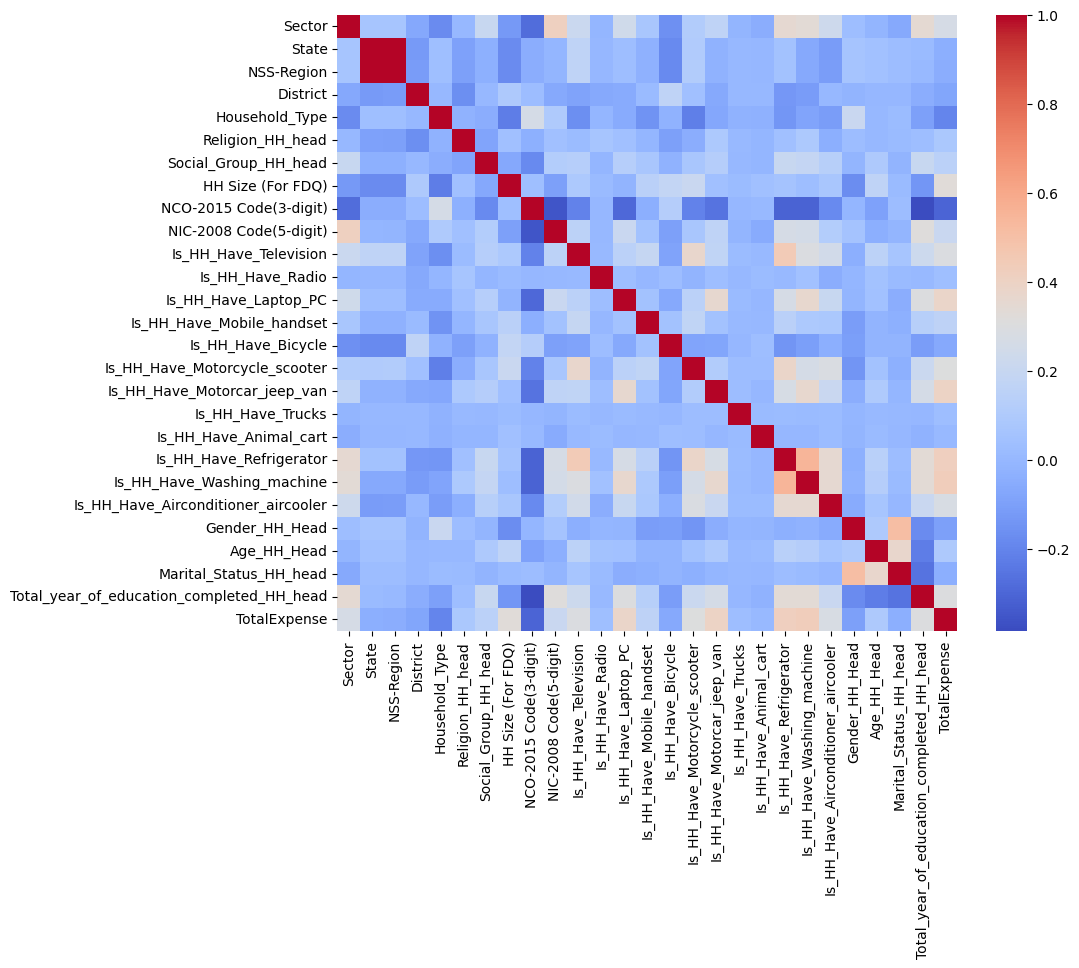

In [4]:
#due to large dataset- i find correlation in features using a heatmap
correlation_matrix = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, cmap = "coolwarm")
plt.show()

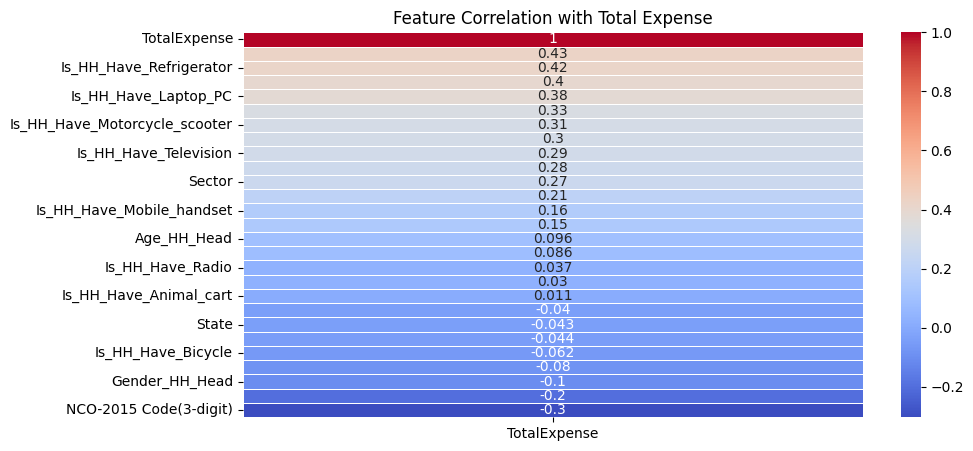

In [5]:
#for more clearer relationship with target variable "Total Expnditure", i construct another heatmap
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix[['TotalExpense']].sort_values(by='TotalExpense', ascending=False), 
            annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation with Total Expense")
plt.show()

from above heatmap, it becomes clear what features are important. it is a good measure to set a threshold. |corr|>0.2 is the initial threshold

In [6]:
threshold = 0.2
target_corr = correlation_matrix["TotalExpense"].abs()
print(target_corr)
select_features = target_corr[target_corr>=threshold].index
df_f = df[select_features]
print("Kept columns:", list(df_f.columns))

Sector                                       0.266310
State                                        0.042623
NSS-Region                                   0.044278
District                                     0.079736
Household_Type                               0.198445
Religion_HH_head                             0.085969
Social_Group_HH_head                         0.148214
HH Size (For FDQ)                            0.327764
NCO-2015 Code(3-digit)                       0.302821
NIC-2008 Code(5-digit)                       0.207181
Is_HH_Have_Television                        0.292548
Is_HH_Have_Radio                             0.037363
Is_HH_Have_Laptop_PC                         0.379241
Is_HH_Have_Mobile_handset                    0.160352
Is_HH_Have_Bicycle                           0.062353
Is_HH_Have_Motorcycle_scooter                0.306847
Is_HH_Have_Motorcar_jeep_van                 0.399234
Is_HH_Have_Trucks                            0.029670
Is_HH_Have_Animal_cart      

In [7]:
#i will work with filtered df
import sklearn as skl
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


#remove target variable for featurs
X = df.drop(columns = ['TotalExpense'])
print(df.columns)
scaler = StandardScaler()
num_cols = ['Total_year_of_education_completed_HH_head', 'HH Size (For FDQ)']
X[num_cols] = scaler.fit_transform(X[num_cols])
y = df['TotalExpense'] #target variable

#70-30 train temp split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
#split temp set into 15-15 test-validate
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Index(['Sector', 'State', 'NSS-Region', 'District', 'Household_Type',
       'Religion_HH_head', 'Social_Group_HH_head', 'HH Size (For FDQ)',
       'NCO-2015 Code(3-digit)', 'NIC-2008 Code(5-digit)',
       'Is_HH_Have_Television', 'Is_HH_Have_Radio', 'Is_HH_Have_Laptop_PC',
       'Is_HH_Have_Mobile_handset', 'Is_HH_Have_Bicycle',
       'Is_HH_Have_Motorcycle_scooter', 'Is_HH_Have_Motorcar_jeep_van',
       'Is_HH_Have_Trucks', 'Is_HH_Have_Animal_cart',
       'Is_HH_Have_Refrigerator', 'Is_HH_Have_Washing_machine',
       'Is_HH_Have_Airconditioner_aircooler', 'Gender_HH_Head', 'Age_HH_Head',
       'Marital_Status_HH_head', 'Total_year_of_education_completed_HH_head',
       'TotalExpense'],
      dtype='object')
Training set: (146577, 26), (146577,)
Validation set: (104698, 26), (104698,)
Test set: (104698, 26), (104698,)


In [8]:
#fundamental linear regression will not help due to absence of linearity in data structure. but i am implementing it as a warm up
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
#lr model evaluation params
y_val_pred = lr_model.predict(X_val)
mae_score = mean_absolute_error(y_val, y_val_pred)
mse_score = mean_squared_error(y_val, y_val_pred)
rmse_score = mse_score**0.5

r2 =  r2_score(y_val, y_val_pred)

print("model evaluations: " , mae_score,rmse_score, r2)
#for further verification that regression will fail at this, we can implement ridge/lasso regression too

#ridge regression
ridge_model = Ridge(alpha=0.7)
ridge_model.fit(X_train, y_train)
y_ridge_pred = ridge_model.predict(X_val)
mae_ridge = mean_absolute_error(y_val, y_val_pred)
mse_ridge = mean_squared_error(y_val, y_val_pred)
rmse_ridge = mse_ridge**0.5
r2_ridge =  r2_score(y_val, y_val_pred)
print("model evaluations: " , mae_ridge,rmse_ridge, r2_ridge)

#lasso regression
lasso_model = Lasso(alpha=1.0) 
lasso_model.fit(X_train, y_train)
y_lasso_pred = lasso_model.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_lasso_pred)
rmse_lasso = mean_squared_error(y_test, y_lasso_pred) ** 0.5
r2_lasso = r2_score(y_test, y_lasso_pred)
print("model evaluations: " , mae_lasso,rmse_lasso, r2_lasso)
#conclusion: L1 regularization works slightly better than L2 


model evaluations:  6098.435320999615 10053.117021083883 0.4640035273201798
model evaluations:  6098.435320999615 10053.117021083883 0.4640035273201798
model evaluations:  6112.1778981056195 10447.61104213505 0.44021280180829536


c:\Users\ritwi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.710e+12, tolerance: 2.835e+09
  model = cd_fast.enet_coordinate_descent(


In [9]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=None, min_samples_split=2)
rf_model.fit(X_train, y_train)

# Predict on test set
y_rf_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_rf_pred)
rmse_rf = mean_squared_error(y_test, y_rf_pred) ** 0.5
r2_rf = r2_score(y_test, y_rf_pred)

# Display results
rf_results = {
    "Model": "Random Forest",
    "MAE": mae_rf,
    "RMSE": rmse_rf,
    "R² Score": r2_rf,
}

rf_results


{'Model': 'Random Forest',
 'MAE': 4267.8054968428505,
 'RMSE': 8010.7313039298915,
 'R² Score': 0.6708958940712726}

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor(random_state=42)

rf_random = RandomizedSearchCV(estimator=rf, 
                               param_distributions=param_grid, 
                               n_iter=10, cv=5, 
                               verbose=2, n_jobs=-1, 
                               random_state=42)

rf_random.fit(X_train, y_train)
print("Best Hyperparameters:", rf_random.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\ritwi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ritwi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ritwi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\ritwi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py

Best Hyperparameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30}


In [11]:
# Get the best parameters
best_params = rf_random.best_params_

# Train optimized Random Forest model
rf_optimized = RandomForestRegressor(**best_params, random_state=42)
rf_optimized.fit(X_train, y_train)

# Predict and evaluate
y_rf_opt_pred = rf_optimized.predict(X_test)
mae_rf_opt = mean_absolute_error(y_test, y_rf_opt_pred)
rmse_rf_opt = mean_squared_error(y_test, y_rf_opt_pred) ** 0.5
r2_rf_opt = r2_score(y_test, y_rf_opt_pred)

print(f"Optimized Random Forest MAE: {mae_rf_opt:.2f}")
print(f"Optimized Random Forest RMSE: {rmse_rf_opt:.2f}")
print(f"Optimized Random Forest R² Score: {r2_rf_opt:.4f}")


Optimized Random Forest MAE: 4672.70
Optimized Random Forest RMSE: 8551.21
Optimized Random Forest R² Score: 0.6250


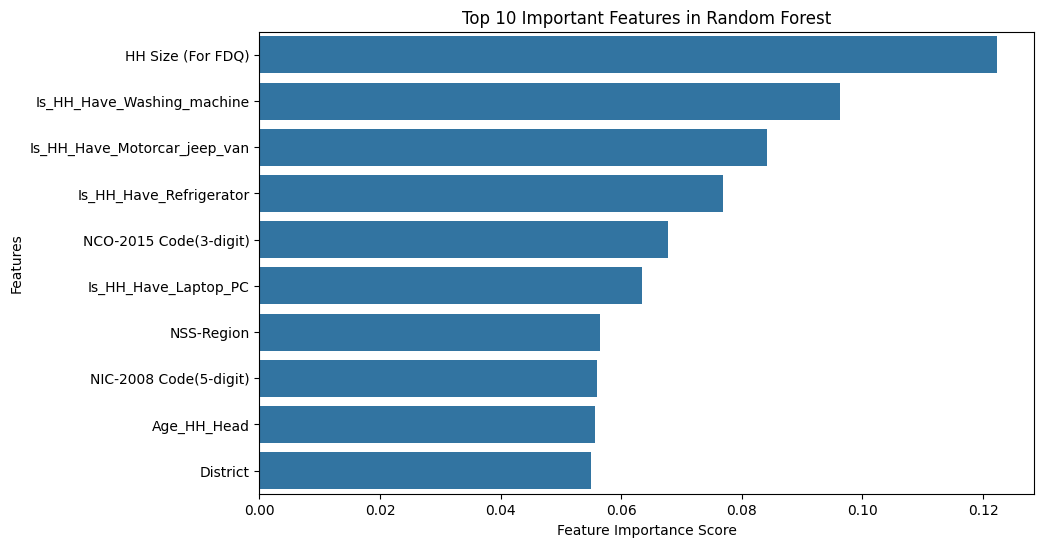

        HH Size (For FDQ)  Is_HH_Have_Washing_machine  \
189748          -1.085237                           0   
181345           1.279304                           0   
2544            -0.139420                           0   
28048            0.333488                           0   
88280           -1.558145                           0   
...                   ...                         ...   
119879           0.333488                           0   
103694          -0.612328                           0   
131932          -0.139420                           1   
146867          -1.558145                           0   
121958           0.333488                           1   

        Is_HH_Have_Motorcar_jeep_van  Is_HH_Have_Refrigerator  \
189748                             0                        0   
181345                             0                        0   
2544                               0                        1   
28048                              0                   

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feature_importance = pd.Series(rf_optimized.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot top 10 important features
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features in Random Forest")
plt.show()

# Select only top important features (e.g., top 10)
important_features = feature_importance.head(10).index
X_train_selected = X_train[important_features]
print(X_train_selected)
X_test_selected = X_test[important_features]
print(X_test_selected)

# Retrain Random Forest using selected features
rf_selected = RandomForestRegressor(**best_params, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Evaluate again
y_rf_sel_pred = rf_selected.predict(X_test_selected)
mae_rf_sel = mean_absolute_error(y_test, y_rf_sel_pred)
rmse_rf_sel = mean_squared_error(y_test, y_rf_sel_pred) ** 0.5
r2_rf_sel = r2_score(y_test, y_rf_sel_pred)

print(f"Random Forest (Selected Features) MAE: {mae_rf_sel:.2f}")
print(f"Random Forest (Selected Features) RMSE: {rmse_rf_sel:.2f}")
print(f"Random Forest (Selected Features) R² Score: {r2_rf_sel:.4f}")


selected features random forest is giving the least R^2 while rf fit with original df is at 0.66 R^2

In [15]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize XGBoost Regressor
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_reg.fit(X_train, y_train)
print(X_train)
y_pred = xgb_reg.predict(X_test)
print(y_pred)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)


print(f"Test MAE: {mae:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R² Score: {r2:.4f}")


        Sector  State  NSS-Region  District  Household_Type  Religion_HH_head  \
189748       1     32         322        10               9                 1   
181345       2     18         181        13               1                 1   
2544         1     27         272        31               2                 1   
28048        1     29         294        26               1                 2   
88280        1     33         333        22               6                 1   
...        ...    ...         ...       ...             ...               ...   
119879       1     21         212        20               1                 3   
103694       1      9          95        13               1                 1   
131932       1      2          21         2               9                 1   
146867       1     23         232        10               5                 1   
121958       1      3          32        20               1                 4   

        Social_Group_HH_hea

In [14]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV


param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5]
}

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)


xgb_random = RandomizedSearchCV(
    estimator=xgb, 
    param_distributions=param_grid, 
    n_iter=10, 
    cv=5, 
    verbose=2, 
    n_jobs=-1, 
    random_state=42
)

xgb_random.fit(X_train, y_train)


best_params = xgb_random.best_params_
print("Best Hyperparameters:", best_params)

best_xgb = XGBRegressor(**best_params, random_state=42)
best_xgb.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.6}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [16]:
train_r2 = best_xgb.score(X_train, y_train)
test_r2 = best_xgb.score(X_test, y_test)

print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

if train_r2 - test_r2 > 0.1:
    print("Overfitting ")
elif train_r2 < test_r2:
    print("Underfitting")
else:
    print("well-balanced.")


Training R² Score: 0.7639
Test R² Score: 0.6407
Overfitting 


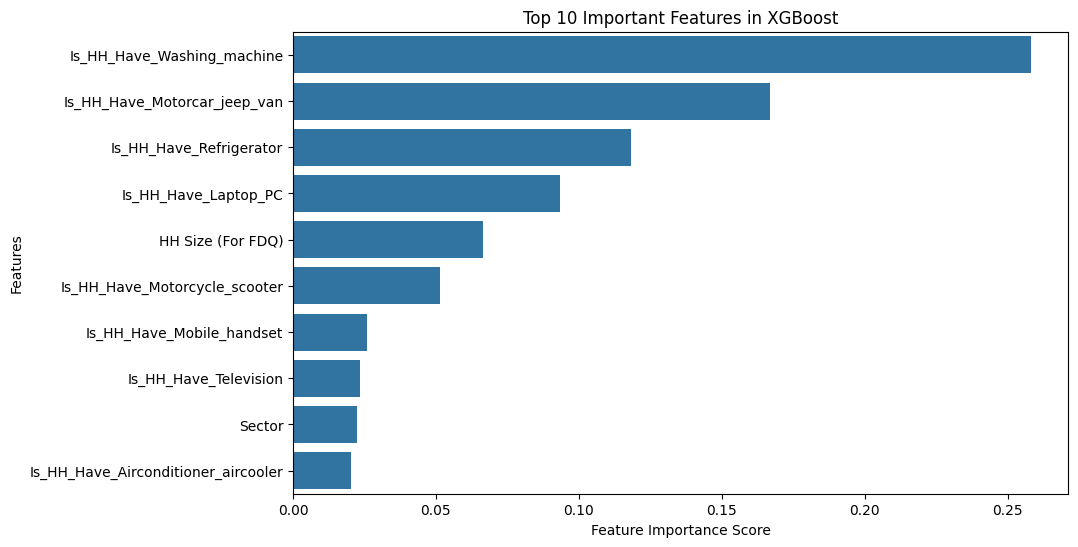

In [17]:


feature_importance = pd.Series(best_xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features in XGBoost")
plt.show()


In [18]:

top_features = feature_importance.head(20).index


X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

best_xgb.fit(X_train_selected, y_train)

y_pred_selected = best_xgb.predict(X_test_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(f"R² Score After Feature Selection: {r2_selected:.4f}")


R² Score After Feature Selection: 0.6307


In [19]:
#i kept some very important features and some from botttom balancing it out. if i was reducing based on absolute importance
#the results were not good.
important_features = feature_importance.head(15).index
additional_features = feature_importance.tail(5).index 
final_features = list(important_features) + list(additional_features)


X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

best_xgb.fit(X_train_final, y_train)
y_pred_final = best_xgb.predict(X_test_final)


r2_final = r2_score(y_test, y_pred_final)
print(f"XGBoost R² Score After Reintroducing Some Features: {r2_final:.4f}")


XGBoost R² Score After Reintroducing Some Features: 0.6188


In [20]:
best_xgb = XGBRegressor(
    n_estimators=600,  
    learning_rate=0.03,  
    max_depth=8, 
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)
best_xgb.fit(X_train, y_train)

y_pred_new = best_xgb.predict(X_test)
r2_new = r2_score(y_test, y_pred_new)

print(f"XGBoost R² Score After More Trees & Depth: {r2_new:.4f}")


XGBoost R² Score After More Trees & Depth: 0.6233


In [21]:
best_xgb = XGBRegressor(
    n_estimators=500,  
    learning_rate=0.05,  
    max_depth=5,  
    min_child_weight=5,  
    subsample=0.8,  
    colsample_bytree=0.8,  
    reg_alpha=0.5,  
    reg_lambda=5.0,  
    random_state=42
)
best_xgb.fit(X_train, y_train)

y_pred_reg = best_xgb.predict(X_test)
r2_reg = r2_score(y_test, y_pred_reg)

print(f" Regularization Applied: New Test R² = {r2_reg:.4f}")
train_r2 = best_xgb.score(X_train, y_train)
test_r2 = best_xgb.score(X_test, y_test)

print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

if train_r2 - test_r2 > 0.1:
    print("Overfitting ")
elif train_r2 < test_r2:
    print("Underfitting")
else:
    print("well-balanced.")

 Regularization Applied: New Test R² = 0.5417
Training R² Score: 0.5735
Test R² Score: 0.5417
well-balanced.


In [22]:
best_xgb = XGBRegressor(
    n_estimators=500,  
    learning_rate=0.09,  
    max_depth=6,  
    min_child_weight=20, 
    subsample=0.8,  
    colsample_bytree=0.8,  
    reg_alpha=5.0, 
    reg_lambda=25.0, 
    random_state=42
)
best_xgb.fit(X_train, y_train)

y_pred_new = best_xgb.predict(X_test)
r2_new = r2_score(y_test, y_pred_new)

print(f"New Test R² = {r2_new:.4f}")


New Test R² = 0.5657


In [23]:
train_r2 = best_xgb.score(X_train, y_train)
test_r2 = best_xgb.score(X_test, y_test)

print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

if train_r2 - test_r2 > 0.1:
    print("Overfitting ")
elif train_r2 < test_r2:
    print("Underfitting")
else:
    print("well-balanced.")

Training R² Score: 0.6181
Test R² Score: 0.5657
well-balanced.


In [24]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=kf, scoring="r2")

print(f"📊 K-Fold Cross-Validation R² Scores: {cv_scores}")
print(f"📉 Average K-Fold R² Score: {cv_scores.mean():.4f}")


📊 K-Fold Cross-Validation R² Scores: [0.55400528 0.4922082  0.54269351 0.54591748 0.56933458]
📉 Average K-Fold R² Score: 0.5408


In [25]:
import numpy as np

cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

print(f"CV Mean: {cv_mean:.4f}, Standard Deviation: {cv_std:.4f}")


CV Mean: 0.5408, Standard Deviation: 0.0260


In [26]:
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1}: R² Score = {score:.4f}")


Fold 1: R² Score = 0.5540
Fold 2: R² Score = 0.4922
Fold 3: R² Score = 0.5427
Fold 4: R² Score = 0.5459
Fold 5: R² Score = 0.5693


In [27]:
best_xgb = XGBRegressor(
    n_estimators=500,  
    learning_rate=0.03,  
    max_depth=7, 
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)
best_xgb.fit(X_train, y_train)

y_pred_new = best_xgb.predict(X_test)
r2_new = r2_score(y_test, y_pred_new)

print(f"XGBoost R² Score After More Trees & Depth: {r2_new:.4f}")
train_r2 = best_xgb.score(X_train, y_train)
test_r2 = best_xgb.score(X_test, y_test)

print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

if train_r2 - test_r2 > 0.1:
    print("Overfitting ")
elif train_r2 < test_r2:
    print("Underfitting")
else:
    print("well-balanced.")

XGBoost R² Score After More Trees & Depth: 0.5888
Training R² Score: 0.6511
Test R² Score: 0.5888
well-balanced.


In [33]:
import lightgbm as lgb
from sklearn.metrics import r2_score,root_mean_squared_error


lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    "boosting type" : "gbdt",
    "objective" : "regression",
    "metric" : {"l1", "l2"},
    "num_leaves" : 20,
    "learning_rate": 0.03,
    "feature_fraction":0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 2, 
    "verbose": 0
}

gbm = lgb.train(
    params, lgb_train, num_boost_round=30, valid_sets=lgb_eval, callbacks=[lgb.early_stopping(stopping_rounds=5)]
)
y_test_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_train_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration)

rmse_test = mean_squared_error(y_test, y_pred) ** 0.5
print(f"The RMSE of prediction is: {rmse_test}")
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.4f}")

rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)

print(f"Train RMSE: {rmse_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")

[LightGBM] [Warning] Unknown parameter: type
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: type
[LightGBM] [Warning] Unknown parameter: type
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[30]	valid_0's l1: 6917.65	valid_0's l2: 1.28471e+08
The RMSE of prediction is: 9099.37246216369
R^2 Score: 0.5754
Train RMSE: 11232.8334
Test RMSE: 11334.5162
